In [2]:
import nn

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

In [6]:
def plot_history(history):
    n=history["epochs"]
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    n=4000
    plt.plot(range(history["epochs"])[:n],history["train_loss"][:n],label="train_loss")
    plt.plot(range(history["epochs"])[:n],history["test_loss"][:n],label="test_loss")
    plt.title("train&test loss")
    plt.grid(1)
    plt.xlabel("epochs")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(range(history["epochs"])[:n],history["train_acc"][:n],label="train_acc")
    plt.plot(range(history["epochs"])[:n],history["test_acc"][:n],label="test_acc")
    plt.title("train&test accuracy")
    plt.grid(1)
    plt.xlabel("epochs")
    plt.legend()
    

# LINEAR MODEL

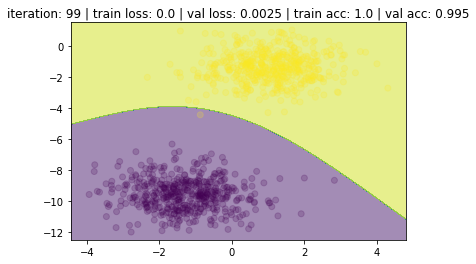

In [9]:
data=datasets.make_blobs(n_samples=1000,centers=2,random_state=2)
X=data[0].T
y=np.expand_dims(data[1],1).T
neural_net=nn.NeuralNetwork([2,2,4,4,1],seed=0)
history=neural_net.train(X=X,y=y,batch_size=16,epochs=100,learning_rate=0.4,print_every=200,validation_split=0.2,tqdm_=False,plot_every=10)

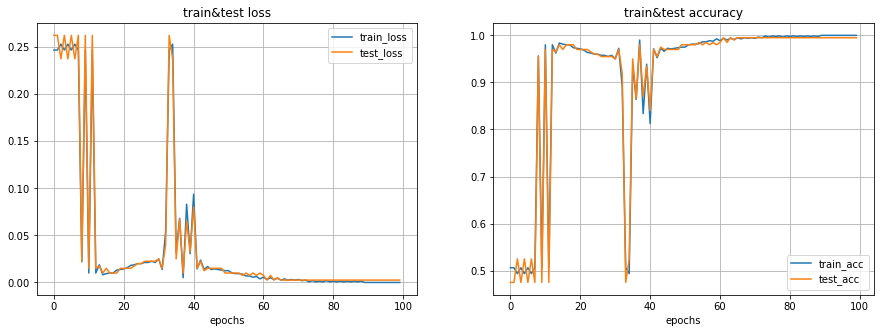

In [10]:
plot_history(history)

# NOISY MOONS

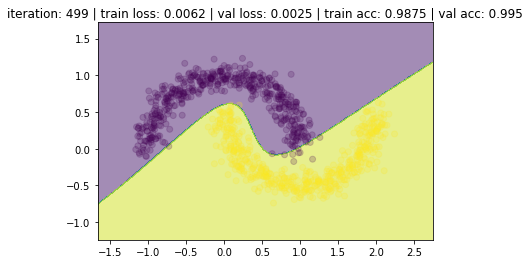

In [11]:
data=datasets.make_moons(n_samples=1000,noise=0.1)
X=data[0].T
y=np.expand_dims(data[1],1).T
neural_net=nn.NeuralNetwork([2,4,4,1],seed=2)
history=neural_net.train(X=X,y=y,batch_size=32,epochs=500,learning_rate=0.4,print_every=200,validation_split=0.2,tqdm_=False,plot_every=15)

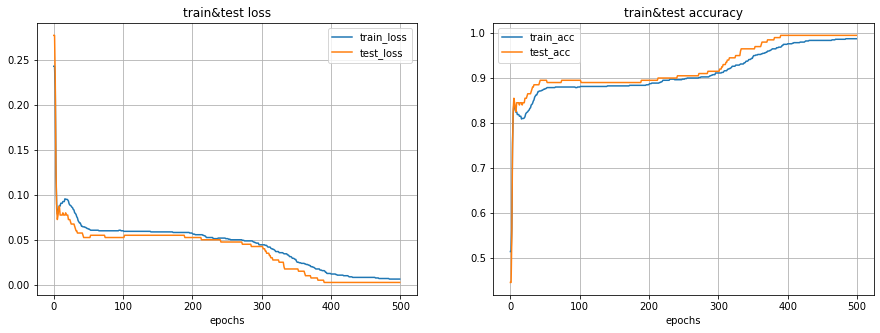

In [12]:
plot_history(history)

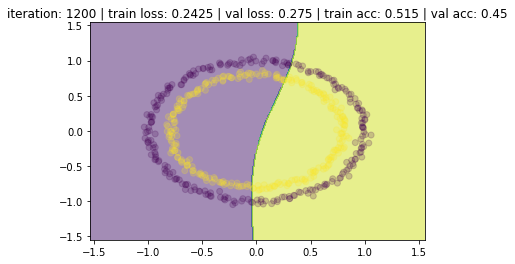

In [13]:
data=datasets.make_circles(n_samples=500,noise=0.025)
X=data[0].T
y=np.expand_dims(data[1],1).T
neural_net=nn.NeuralNetwork([2,4,1],seed=11)
history=neural_net.train(X=X,y=y,batch_size=16,epochs=1201,learning_rate=0.04,print_every=200,validation_split=0.2,tqdm_=False,plot_every=50)

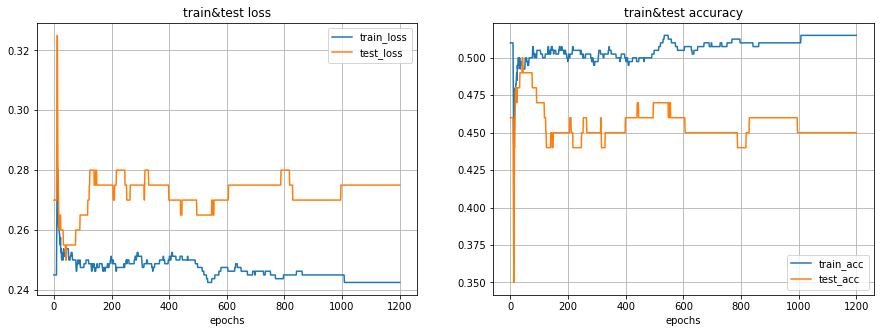

In [14]:

plot_history(history)

# XOR MODEL

In [19]:
def generate_points(n,centers,labels,amplitude):
    x1_noisy=[]
    x2_noisy=[]
    y=[]
    for center,c in zip(centers,labels):
        x1,x2=center
        noise_x1=np.random.rand(n)
        noise_x2=np.random.rand(n)
        x1_noisy+=(noise_x1+x1).tolist()
        x2_noisy+=(noise_x2+x2).tolist()
        y+=[c]*n
    X=list(zip(x1_noisy,x2_noisy))
    X=np.array(X)
    y=np.array(y)
    y=np.expand_dims(y,1)
    X=X.T
    y=y.T
    return X,y
X, y = generate_points(500, [(0, 0), (0, 1), (1, 0), (1, 1)], [0, 1, 1, 0], 0.005)

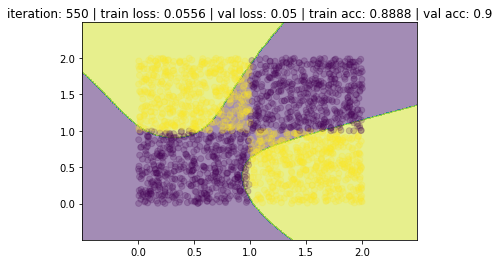

In [20]:
neural_net=nn.NeuralNetwork([2,4,1],seed=3)
history=neural_net.train(X=X,y=y,batch_size=64,epochs=551,learning_rate=0.2,print_every=200,validation_split=0.2,tqdm_=False,plot_every=25)

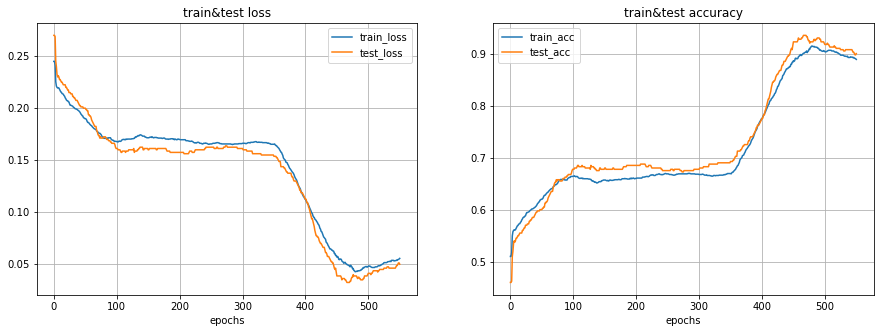

In [21]:
plot_history(history)